## Dataset Import

In [70]:
from google.colab import files
uploaded = files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [71]:
dataset_name = 'parnianmalekian/country-dataset'
!kaggle datasets download -d $dataset_name

!unzip country-dataset.zip
!rm country-dataset.zip

!ls

  0% 0.00/4.68k [00:00<?, ?B/s]
100% 4.68k/4.68k [00:00<00:00, 6.45MB/s]
Archive:  country-dataset.zip
replace Country-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Country-data.csv        
Country-data.csv  sample_data


## Importing Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

scaler = StandardScaler()

## EDA

In [73]:
dataset = pd.read_csv("Country-data.csv")
dataset

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

#### Dataset summary

In [74]:
dataset.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [75]:
dataset.info

<bound method DataFrame.info of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2      

In [76]:
dataset.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

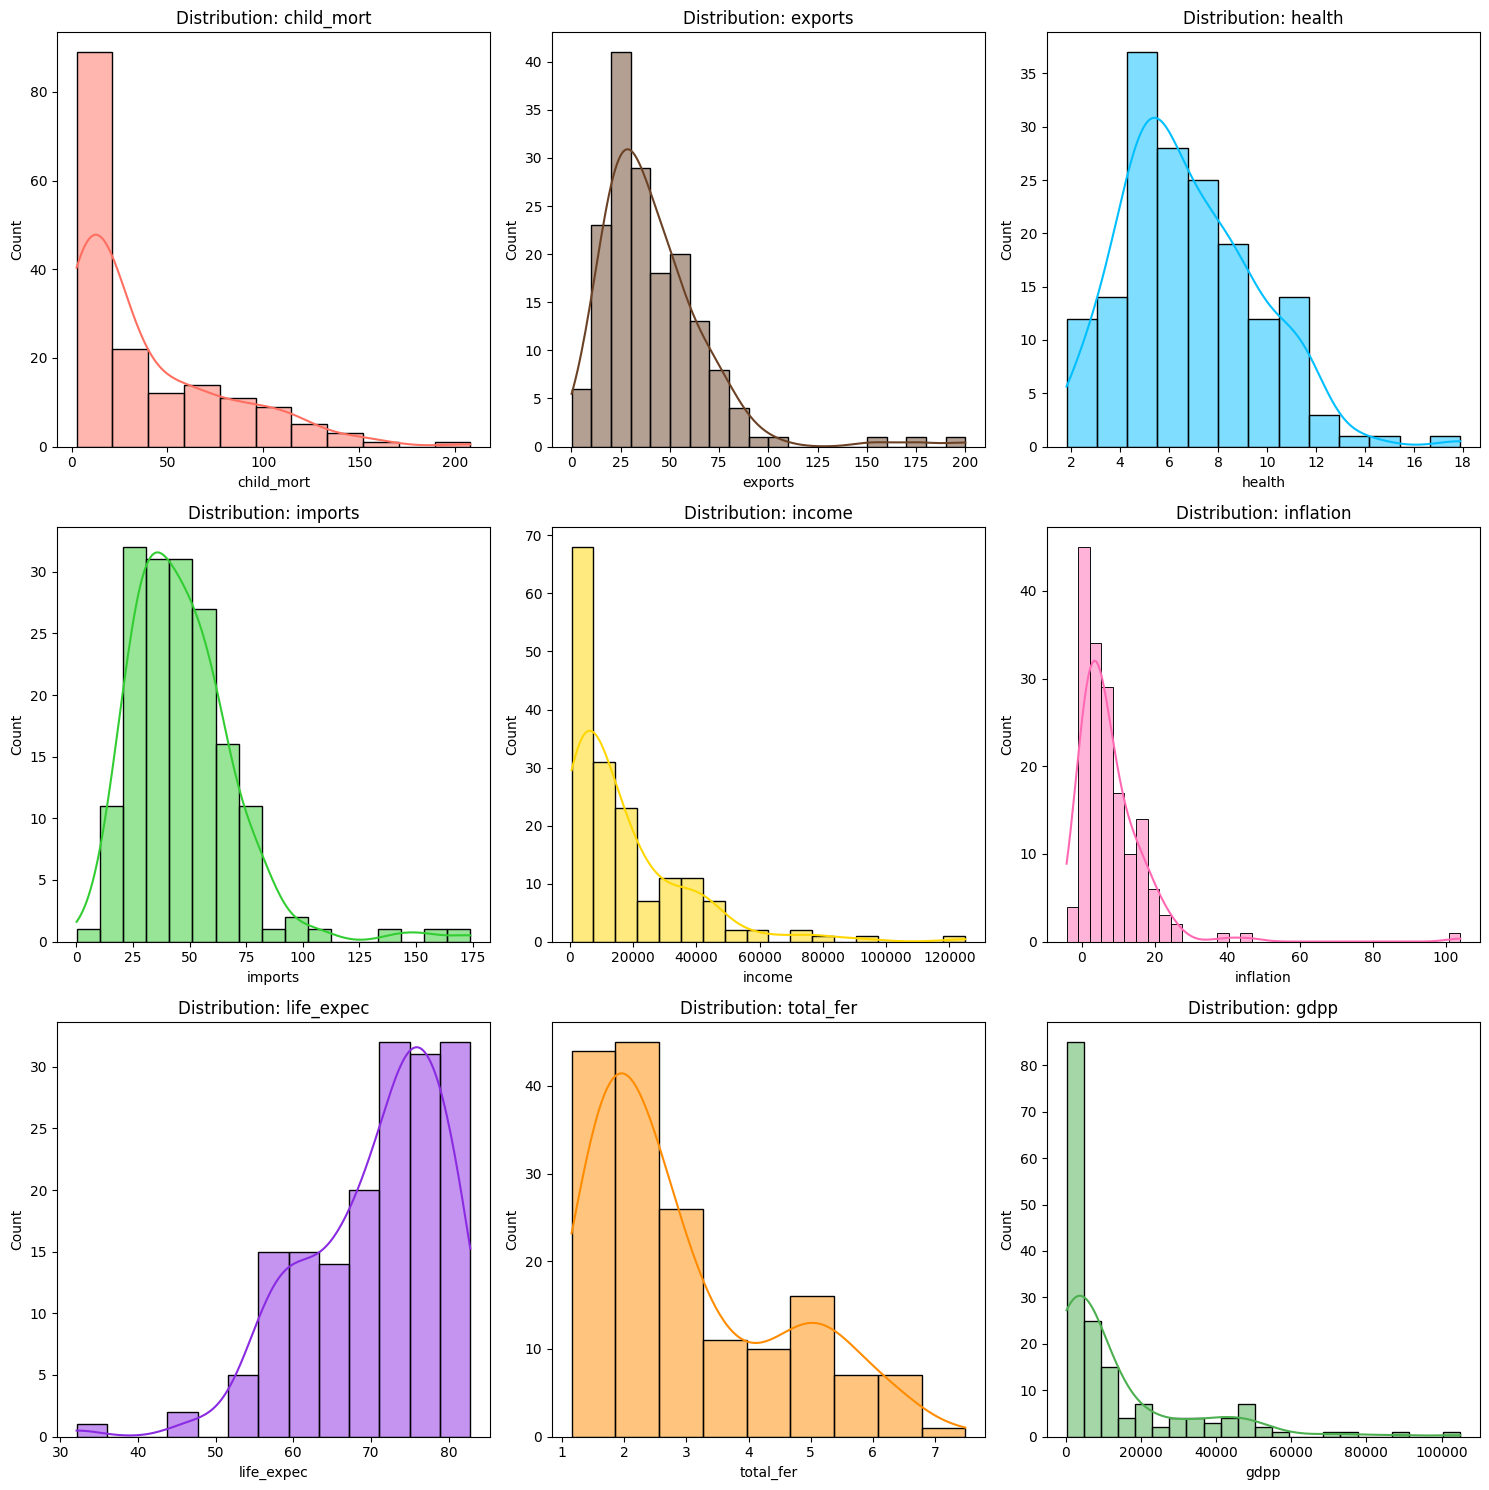

In [77]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
ftr_cols = dataset.iloc[:, 1:].columns
colors = ['#FF6F61', '#6B4226', '#00BFFF', '#32CD32', '#FFD700', '#FF69B4', '#8A2BE2', '#FF8C00', '#4CAF50']

for i in range(len(ftr_cols)):
    plt.subplot(3, 3, i+1)
    sns.histplot(dataset[ftr_cols[i]], color=colors[i], kde=True)
    title = 'Distribution: ' + ftr_cols[i]
    plt.title(title)

plt.tight_layout()
plt.show()

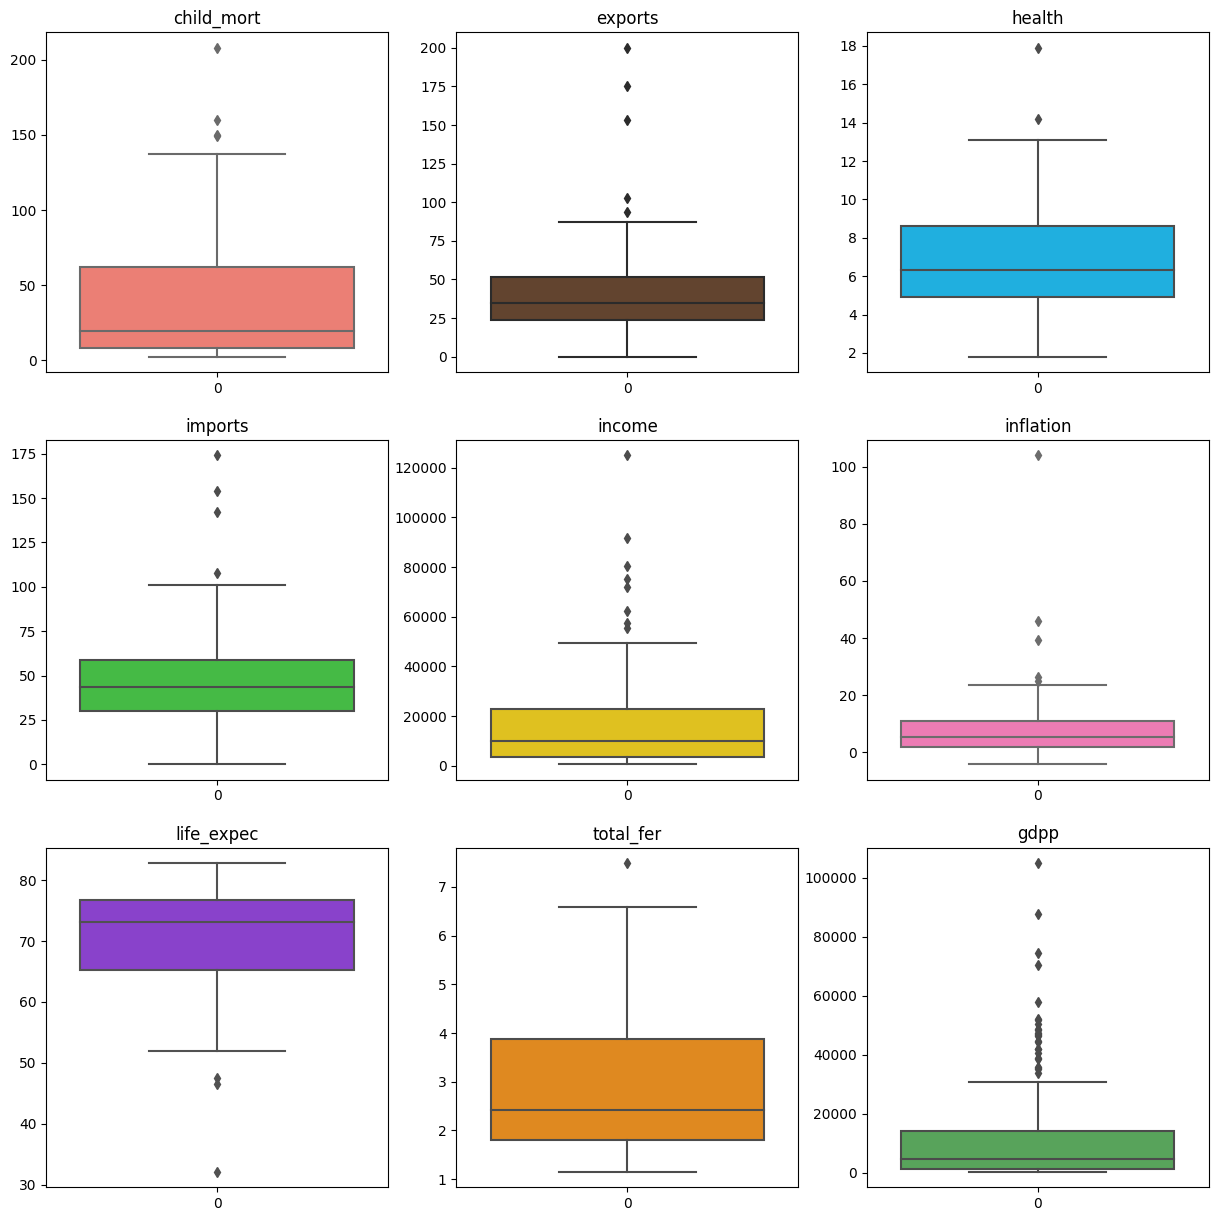

In [78]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i in range(len(ftr_cols)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(dataset[ftr_cols[i]],color = colors[i])
    plt.title(ftr_cols[i])

plt.show()

#### Correlation heatmap

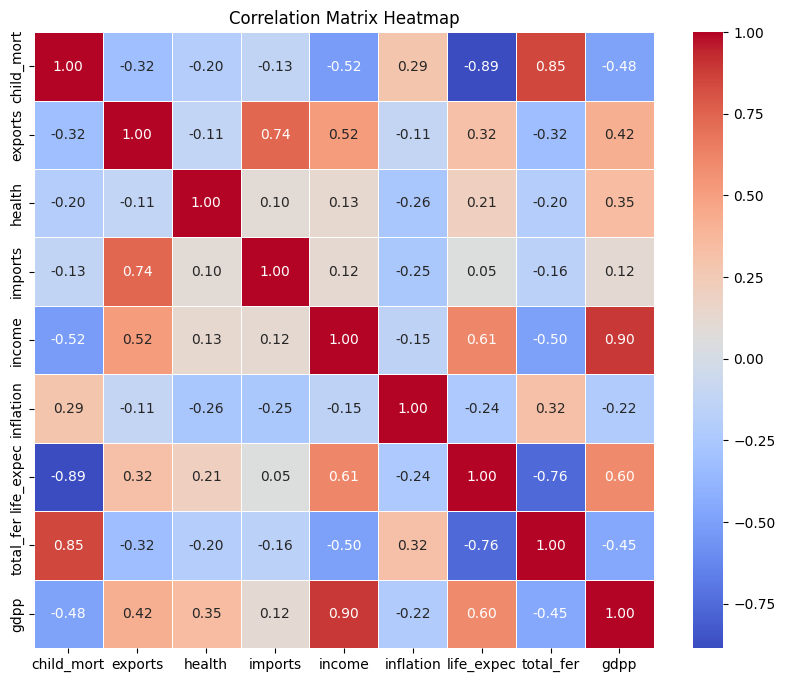

In [79]:
corr_set = dataset.drop('country', axis=1).corr()
plt.figure(figsize=(10, 8))

sns.heatmap(corr_set, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

#### Inflation analysis

Countries with High Inflation:
               country  inflation
113            Nigeria      104.0
163          Venezuela       45.9
103           Mongolia       39.2
149        Timor-Leste       26.5
49   Equatorial Guinea       24.9
165              Yemen       23.6
140          Sri Lanka       22.8
3               Angola       22.4
5            Argentina       20.9
37    Congo, Dem. Rep.       20.8

Correlation with Inflation:
inflation     1.000000
total_fer     0.316921
child_mort    0.288276
exports      -0.107294
income       -0.147756
gdpp         -0.221631
life_expec   -0.239705
imports      -0.246994
health       -0.255376
Name: inflation, dtype: float64


<ipython-input-80-b864671e19f8>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



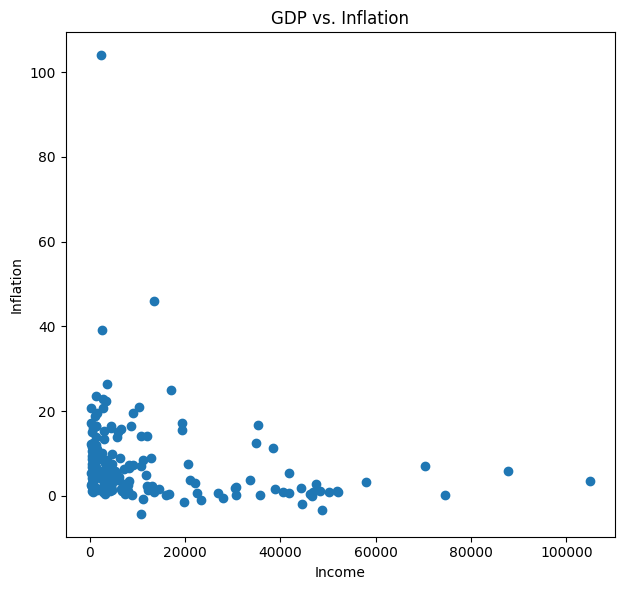

In [80]:
high_inflation_countries = dataset.sort_values(by='inflation', ascending=False).head(10)
print("Countries with High Inflation:")
print(high_inflation_countries[['country', 'inflation']])

correlation_with_inflation = dataset.corr()['inflation'].sort_values(ascending=False)

# Display correlation coefficients
print("\nCorrelation with Inflation:")
print(correlation_with_inflation)

inflation_col = dataset[['inflation']]

#GDP vs inflation plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(dataset['gdpp'], inflation_col)
plt.title('GDP vs. Inflation')
plt.xlabel('Income')
plt.ylabel('Inflation')

plt.tight_layout()
plt.show()


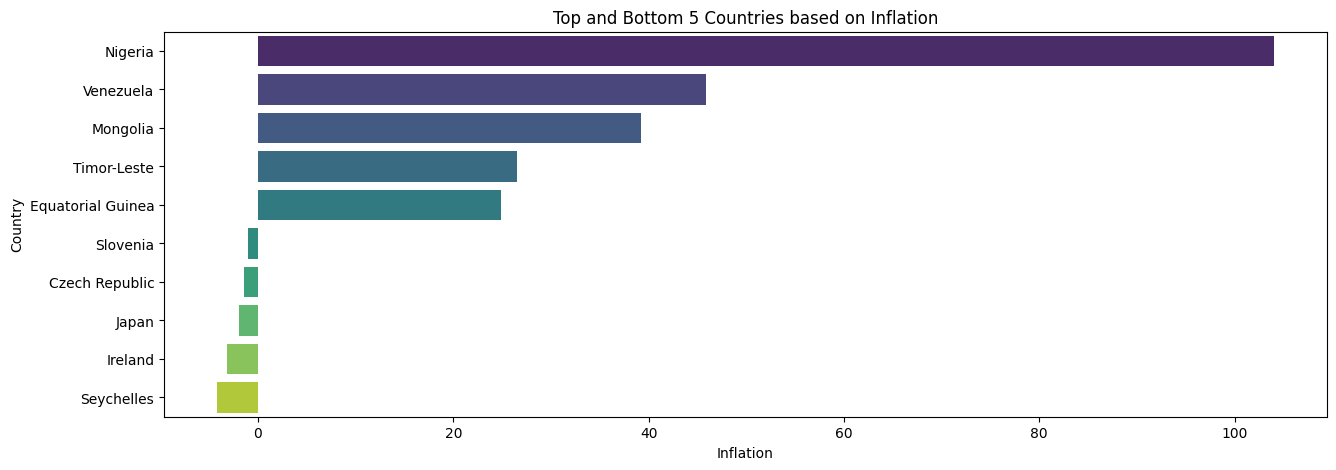

In [81]:
df_inf_srt = dataset.sort_values(by='inflation', ascending=False)
top_and_bottom_inf_df = pd.concat([df_inf_srt.head(5), df_inf_srt.tail(5)])

# Create subplots
fig, axes = plt.subplots(1, 1, figsize=(15, 5))

# Plot for inflation
sns.barplot(x='inflation', y='country', data=top_and_bottom_inf_df, palette='viridis')
axes.set_title('Top and Bottom 5 Countries based on Inflation')
axes.set_xlabel('Inflation')
axes.set_ylabel('Country')


plt.show()

#### Income Distribution

<ipython-input-82-29b18e0a277c>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



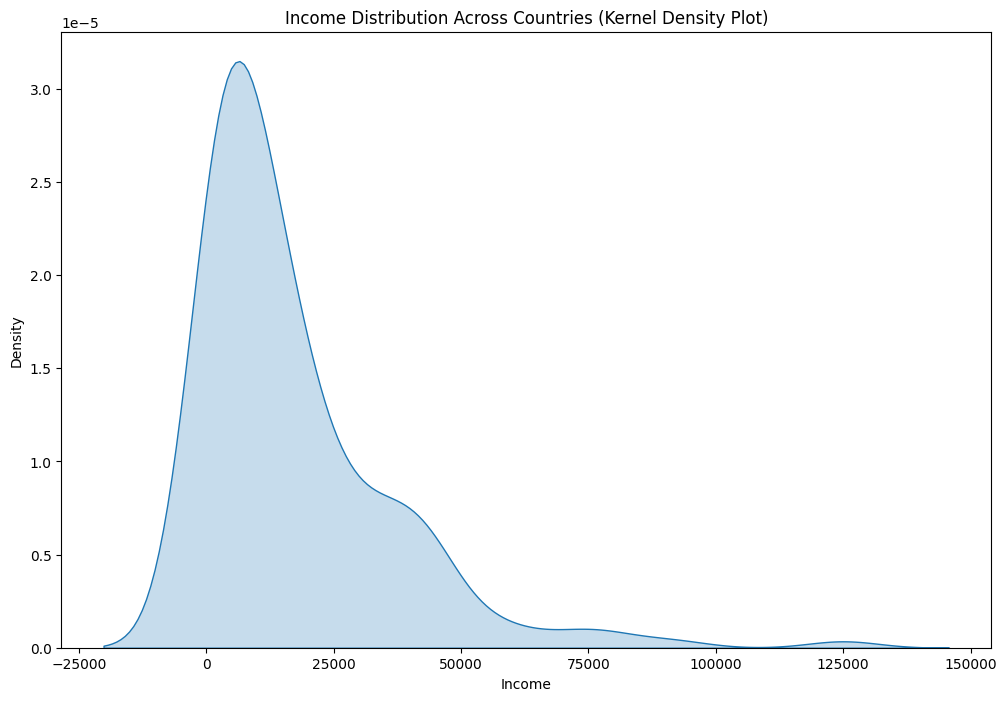

In [82]:
plt.figure(figsize=(12, 8))

sns.kdeplot(dataset['income'], fill=True, palette='viridis')

plt.title('Income Distribution Across Countries (Kernel Density Plot)')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()

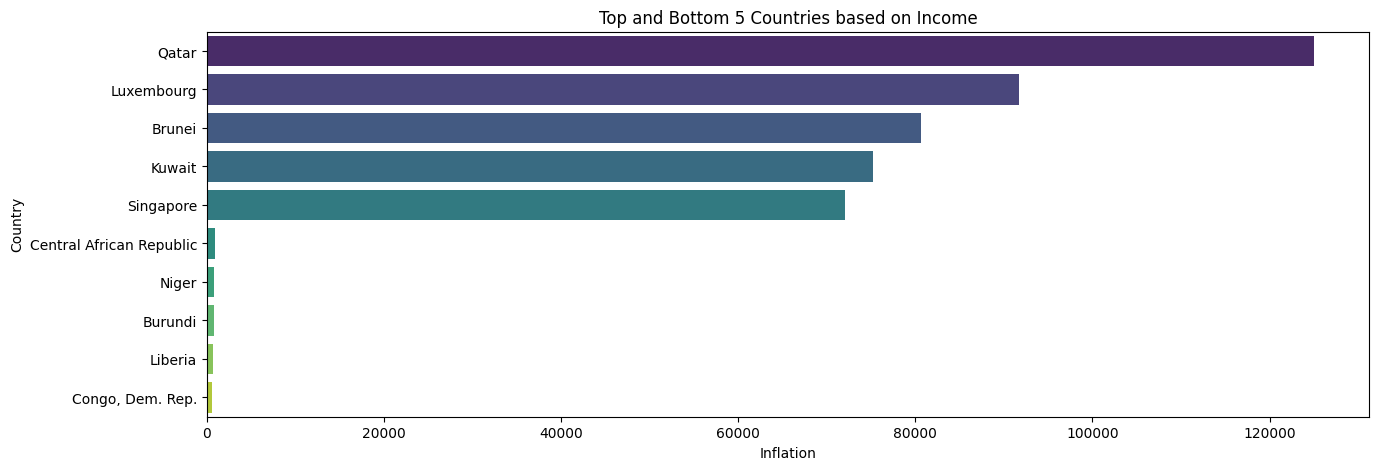

In [83]:
df_inc_srt = dataset.sort_values(by='income', ascending=False)
top_and_bottom_inc_df = pd.concat([df_inc_srt.head(5), df_inc_srt.tail(5)])

fig, axes = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='income', y='country', data=top_and_bottom_inc_df, palette='viridis')
axes.set_title('Top and Bottom 5 Countries based on Income')
axes.set_xlabel('Inflation')
axes.set_ylabel('Country')


plt.show()

#### Trade Balance Analysis

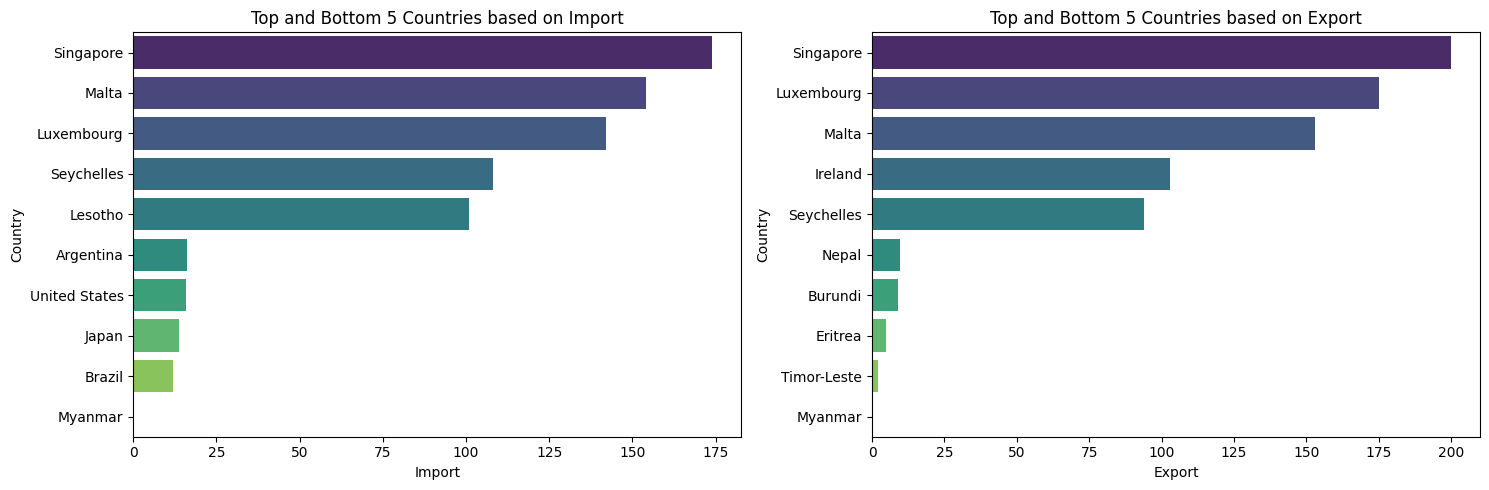

In [84]:
df_imp_srt = dataset.sort_values(by='imports', ascending=False)
top_and_bottom_imp_df = pd.concat([df_imp_srt.head(5), df_imp_srt.tail(5)])

# Sort the DataFrame by 'exports' column
df_exp_srt = dataset.sort_values(by='exports', ascending=False)
top_and_bottom_exp_df = pd.concat([df_exp_srt.head(5), df_exp_srt.tail(5)])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x='imports', y='country', data=top_and_bottom_imp_df, palette='viridis', ax=axes[0])
axes[0].set_title('Top and Bottom 5 Countries based on Import')
axes[0].set_xlabel('Import')
axes[0].set_ylabel('Country')

sns.barplot(x='exports', y='country', data=top_and_bottom_exp_df, palette='viridis', ax=axes[1])
axes[1].set_title('Top and Bottom 5 Countries based on Export')
axes[1].set_xlabel('Export')
axes[1].set_ylabel('Country')

plt.tight_layout()
plt.show()

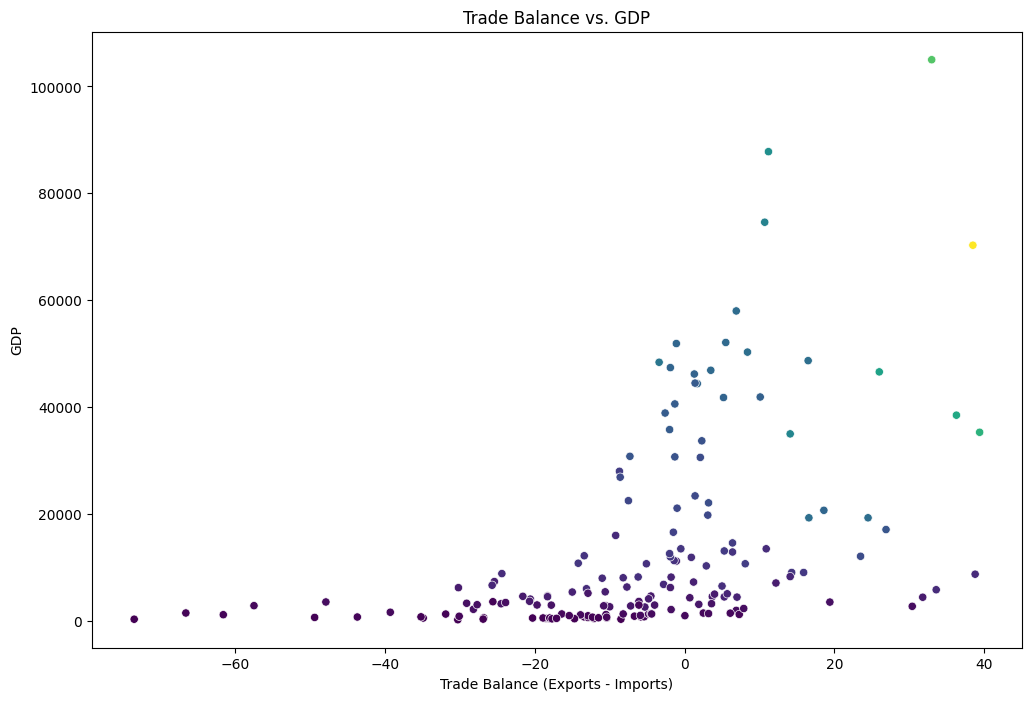

In [94]:
temp_df = pd.DataFrame({
    'trade_balance': dataset['exports'] - dataset['imports'],
    'gdpp': dataset['gdpp'],
    'income': dataset['income'],
    'country':dataset['country'],
    'inflation':dataset['inflation']
})

plt.figure(figsize=(12, 8))
sns.scatterplot(x='trade_balance', y='gdpp', data=temp_df, hue='income', palette='viridis', legend=False)
plt.title('Trade Balance vs. GDP')
plt.xlabel('Trade Balance (Exports - Imports)')
plt.ylabel('GDP')
plt.show()

Text(0, 0.5, 'Country')

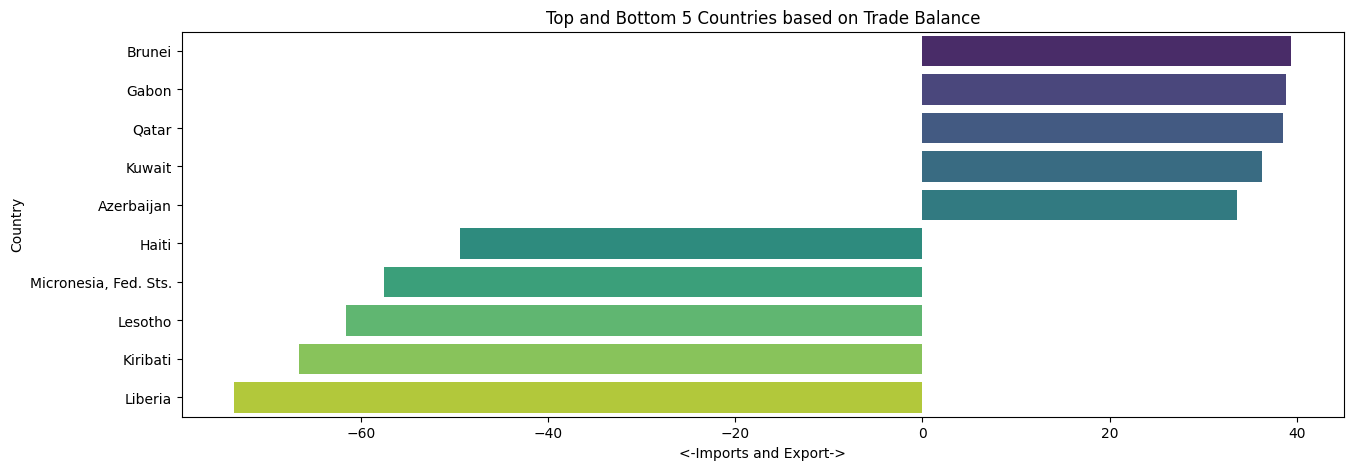

In [95]:
df_trd_srt = temp_df.sort_values(by='trade_balance', ascending=False)
top_and_bottom_trd_df = pd.concat([df_trd_srt.head(5), df_trd_srt.tail(5)])

fig, axes = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='trade_balance', y='country', data = top_and_bottom_trd_df, palette='viridis')
axes.set_title('Top and Bottom 5 Countries based on Trade Balance')
axes.set_xlabel('<-Imports and Export->')
axes.set_ylabel('Country')


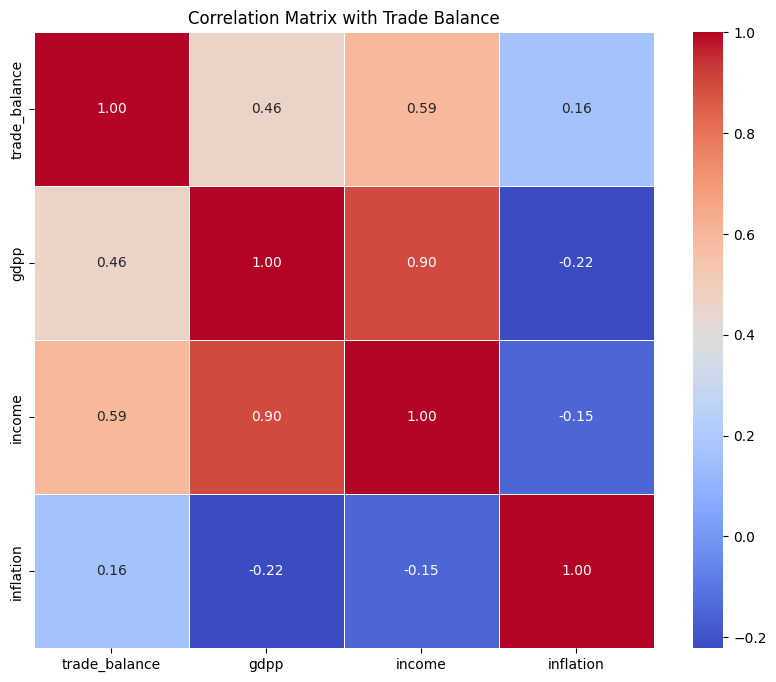

In [96]:
trade_corr = temp_df[['trade_balance', 'gdpp', 'income', 'inflation']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(trade_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix with Trade Balance')
plt.show()

#### Child Mortality and Fertility

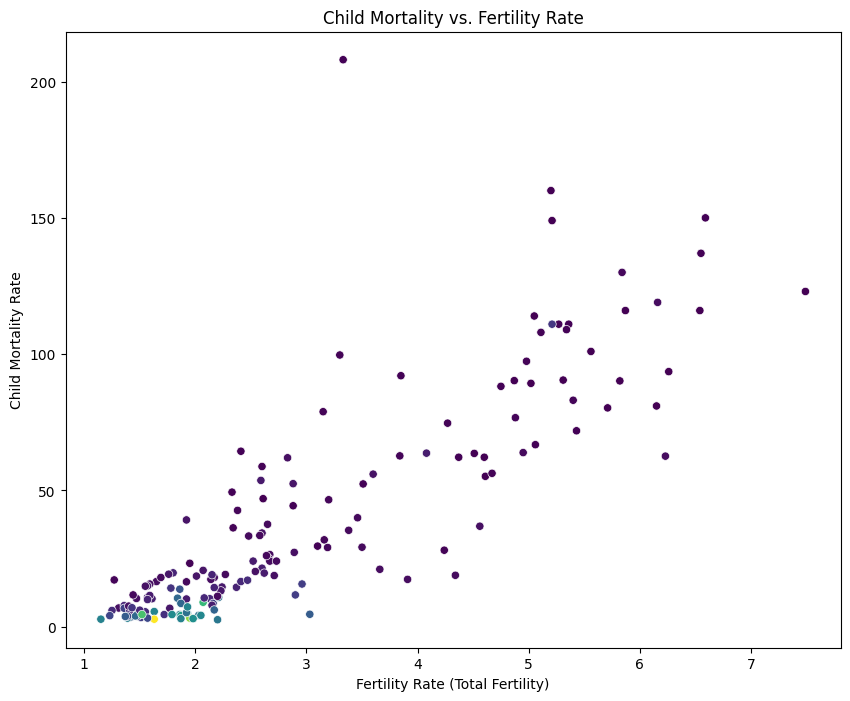

In [97]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='total_fer', y='child_mort', data=dataset, hue='gdpp', palette='viridis', legend=False)
plt.title('Child Mortality vs. Fertility Rate')
plt.xlabel('Fertility Rate (Total Fertility)')
plt.ylabel('Child Mortality Rate')
plt.show()

## PCA

In [98]:
countries = dataset['country']

ftr_df = dataset.select_dtypes(include=['float64', 'int64'])
df = scaler.fit_transform(ftr_df)
df

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

#### PCA variance plots

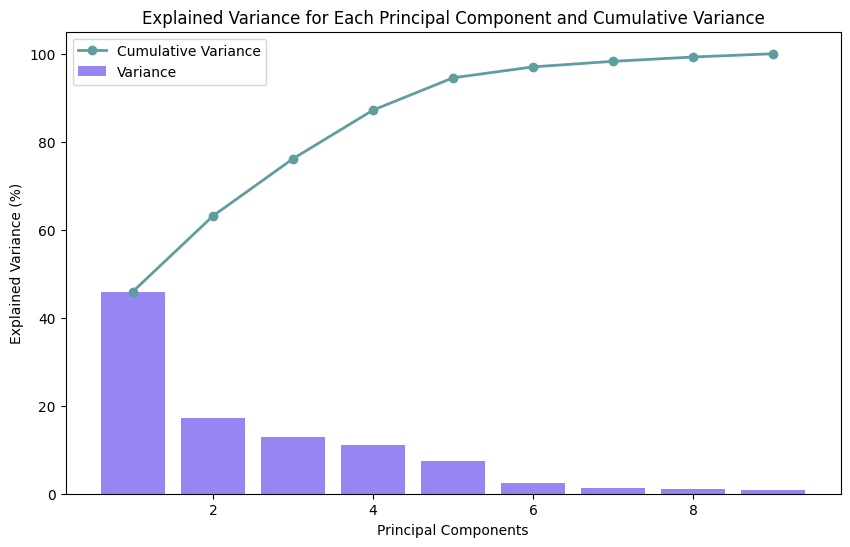

In [99]:
pca = PCA()
pc_np = pca.fit_transform(df)
pc_df = pd.DataFrame(pc_np, columns=[f'PC{i+1}' for i in range(pc_np.shape[1])])

var_exp = pca.explained_variance_ratio_ * 100
cum_sm = np.cumsum(var_exp)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(var_exp ) + 1), var_exp , color='mediumslateblue', alpha=0.8, align='center', label='Variance')
plt.plot(range(1, len(cum_sm) + 1), cum_sm, color='cadetblue', marker='o', linestyle='-', linewidth=2, label='Cumulative Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance for Each Principal Component and Cumulative Variance')
plt.legend()
plt.show()

#### PCA analysis and plots

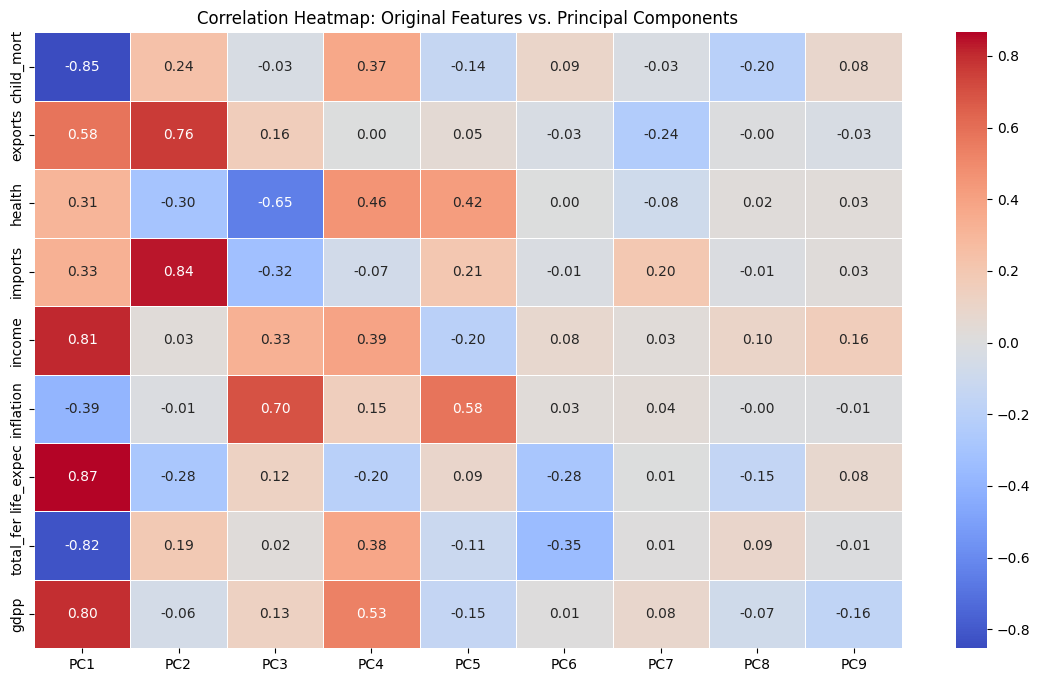

In [100]:
corr_df = pd.concat([ftr_df, pc_df], axis=1)

og_ftr = ftr_df.columns
pca_ftr = pc_df.columns

plt.figure(figsize=(14, 8))
sns.heatmap(corr_df.corr().loc[og_ftr, pca_ftr], cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap: Original Features vs. Principal Components')
plt.show()

In [101]:
x_pc = pc_df['PC1']
y_pc = pc_df['PC2']
z_pc = pc_df['PC3']

fig = px.scatter_3d(pc_df, x=x_pc, y=y_pc, z=z_pc, text=countries, title='3D Scatter Plot of PCA Components')
fig.update_traces(marker=dict(size=8, opacity=0.8))

fig.update_layout(scene=dict(xaxis_title='Principal Component 1', yaxis_title='Principal Component 2', zaxis_title='Principal Component 3'))
fig.show()


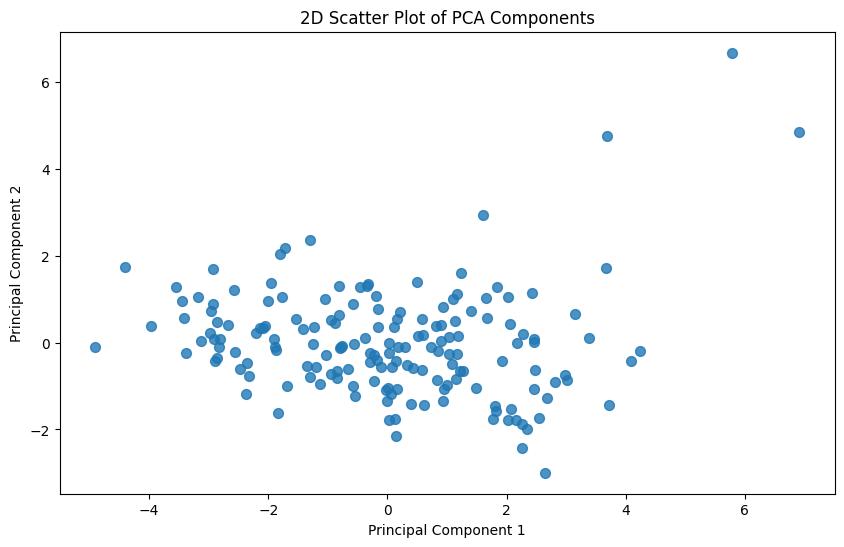

In [102]:
x_pc = pc_df['PC1']
y_pc = pc_df['PC2']

# Scatter plot in 2D
plt.figure(figsize=(10, 6))
plt.scatter(x_pc, y_pc, s=50, alpha=0.8)

# Adding labels and title
plt.title('2D Scatter Plot of PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

#### PCA variance table

In [103]:
cmpnt = pd.DataFrame({
    'Principal Component': range(1, len(var_exp) + 1),
    'Explained Variance (%)': var_exp,
    'Cumulative Variance (%)': cum_sm
})

cmpnt['Explained Variance (%)'] = cmpnt['Explained Variance (%)'].map('{:.2f}'.format)
cmpnt['Cumulative Variance (%)'] = cmpnt['Cumulative Variance (%)'].map('{:.2f}'.format)

print("Table of Components vs Explained Variance (Percentages):")
print(cmpnt.to_string(index=False))

Table of Components vs Explained Variance (Percentages):
 Principal Component Explained Variance (%) Cumulative Variance (%)
                   1                  45.95                   45.95
                   2                  17.18                   63.13
                   3                  13.00                   76.14
                   4                  11.05                   87.19
                   5                   7.34                   94.53
                   6                   2.48                   97.02
                   7                   1.26                   98.28
                   8                   0.98                   99.26
                   9                   0.74                  100.00


In [104]:
pca = PCA(n_components=6)
pc_np = pca.fit_transform(df)

## K-Means

### Optimum number of Clusters

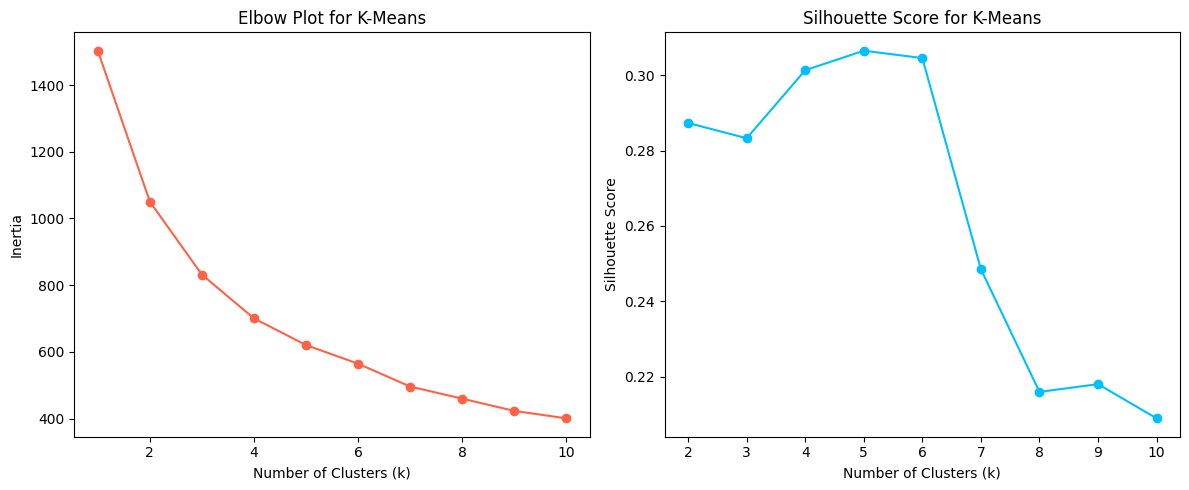

In [105]:
k_vals = range(1, 11)

inert = []
silht = []


for k in k_vals:
    kmeans = KMeans(n_clusters=k, max_iter = 1000, n_init=10)
    kmeans.fit(pc_df)
    inert.append(kmeans.inertia_)

    if(k != 1):
        labels = kmeans.labels_
        silht_avg = silhouette_score(pc_df, labels, metric = 'euclidean')
        silht.append(silht_avg)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_vals, inert, marker='o', color='tomato')
plt.title('Elbow Plot for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_vals[1:], silht, marker='o', color='deepskyblue')
plt.title('Silhouette Score for K-Means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

### Clustering

In [106]:
means_3 = KMeans(n_clusters=3, max_iter = 1000, n_init=10)

clust_data = means_3.fit_predict(pc_df)

kmn_df = pd.concat([countries, pd.Series(clust_data, name='cluster')], axis=1)

kmn_df

country  cluster
0            Afghanistan        1
1                Albania        0
2                Algeria        0
3                 Angola        1
4    Antigua and Barbuda        0
..                   ...      ...
162              Vanuatu        0
163            Venezuela        0
164              Vietnam        0
165                Yemen        1
166               Zambia        1

[167 rows x 2 columns]

### Analysis - 2 clusters

In [107]:
fig = px.choropleth(
    kmn_df,
    locations='country',
    locationmode='country names',
    color='cluster',
    color_continuous_scale='Sunset',
    labels={'cluster': 'Cluster'},
    title='K-Means Clusters on World Map'
)


fig.show()

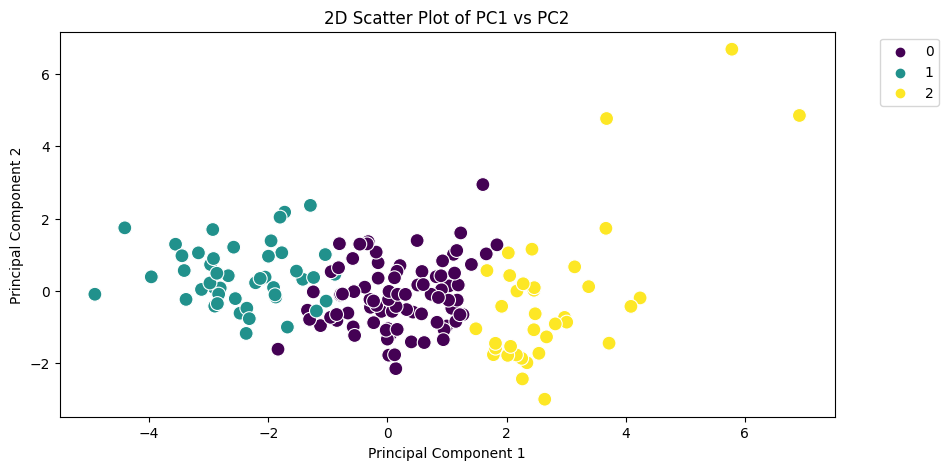

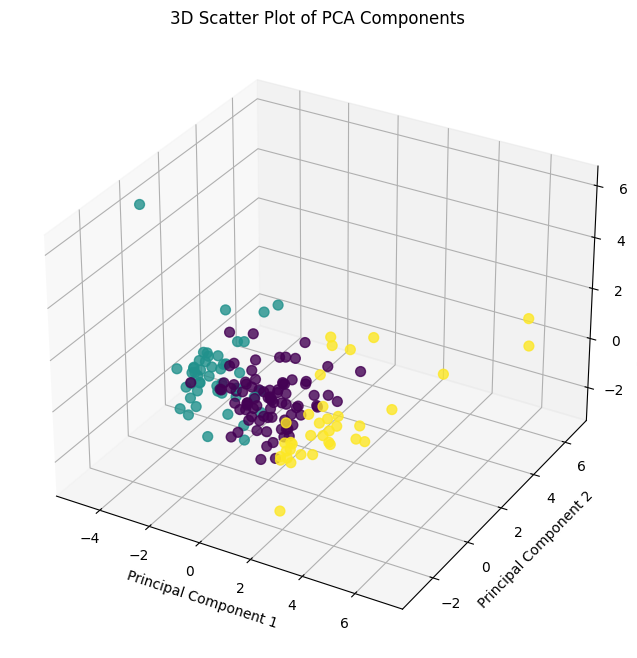

In [108]:
cnt_pc = pd.concat([pc_df, kmn_df], axis=1)


# 2D Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data = cnt_pc, palette='viridis', markers=True, s=100)
plt.title('2D Scatter Plot of PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(cnt_pc['PC1'], cnt_pc['PC2'], cnt_pc['PC3'], c=cnt_pc['cluster'], cmap='viridis', s=50, alpha=0.8)
ax.set_title('3D Scatter Plot of PCA Components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
legend = ax.legend(*scatter.legend_elements(), title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.add_artist(legend)

plt.show()

In [109]:
kmn_df[kmn_df["cluster"] == 0]["country"]

1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
160                Uruguay
161             Uzbekistan
162                Vanuatu
163              Venezuela
164                Vietnam
Name: country, Length: 84, dtype: object

In [110]:
kmn_df[kmn_df["cluster"] == 1]["country"]

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [111]:
kmn_df[kmn_df["cluster"] == 2]["country"]

7                 Australia
8                   Austria
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
122                Portugal
123                   Qatar
133               Singapore
134         Slovak Republic
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United